In [2]:
import pandas as pd
import numpy as np

In [84]:
# EDA 
#Loading the dataset:

data = pd.read_csv("AB_NYC_2019.csv")
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [7]:
#shape of the 'price' variable
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<AxesSubplot:xlabel='price', ylabel='Count'>

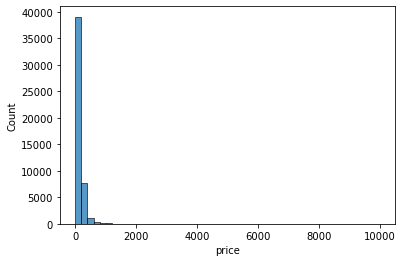

In [9]:
sns.histplot(data.price, bins=50)

<AxesSubplot:xlabel='price', ylabel='Count'>

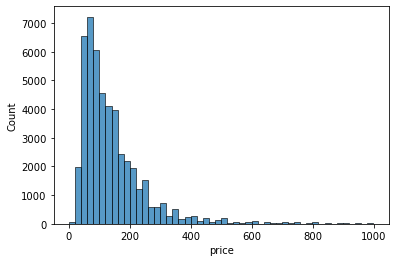

In [20]:
#zoomed tail
sns.histplot(data.price[data.price < 1000], bins=50)


'Price' has a long tail.

### Features

For the rest of the homework, you'll need to use only these columns:

* `'latitude'`,
* `'longitude'`,
* `'price'`,
* `'minimum_nights'`,
* `'number_of_reviews'`,
* `'reviews_per_month'`,
* `'calculated_host_listings_count'`,
* `'availability_365'`

Select only them.

In [85]:
new_data = data[['latitude', 'longitude', 'price', 'minimum_nights','number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count','availability_365']]
new_data.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,40.64749,-73.97237,149,1,9,0.21,6,365
1,40.75362,-73.98377,225,1,45,0.38,2,355
2,40.80902,-73.94190,150,3,0,NaN,1,365
3,40.68514,-73.95976,89,1,270,4.64,1,194
4,40.79851,-73.94399,80,10,9,0.10,1,0


### Question 1
Find a feature with missing values. How many missing values does it have?

In [12]:
new_data.isna().sum()

latitude                              0
longitude                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

The data has 10052 missing variables only in a single column named *revied_per_month*.

### Question 2
What's the median (50% percentile) for variable 'minimum_nights'?

In [15]:
new_data['minimum_nights'].describe()

count    48895.000000
mean         7.029962
std         20.510550
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64

In [17]:
#or we can select only the median of this column by specifying quantile as below

print('The median of minimum_nights:',new_data['minimum_nights'].quantile(0.5))

The median of minimum_nights: 3.0


### Split the data

* Shuffle the initial dataset, use seed `42`.
* Split your data in train/val/test sets, with 60%/20%/20% distribution.
* Make sure that the target value ('price') is not in your dataframe.
* Apply the log transformation to the price variable using the `np.log1p()` function.

In [86]:
n = len(new_data)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [87]:
n_val, n_test, n_train

(9779, 9779, 29337)

In [88]:
idx=np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)

In [89]:
df_train = new_data.iloc[idx[:n_train]]
df_val = new_data.iloc[idx[n_train:n_train*n_val]]
df_test = new_data.iloc[idx[n_train+n_val:]]

In [90]:
df_train.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
879,40.64354,-73.97777,89,3,62,0.71,1,189
44383,40.70666,-73.90779,30,21,0,NaN,1,73
15394,40.76116,-73.99016,120,2,17,0.43,1,0
43230,40.70763,-74.01050,470,2,5,1.88,327,272
16332,40.79658,-73.93287,199,2,30,0.80,1,30


In [91]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [92]:
#log transformation to the price variable using the np.log1p() function
y_train = np.log1p(df_train.price.values)
y_test = np.log1p(df_test.price.values)
y_val = np.log1p(df_val.price.values)

In [93]:
#Drop 'price'
del df_train['price']
del df_test['price']
del df_val['price']

### Question 3

* We need to deal with missing values for the column from Q1.
* We have two options: fill it with 0 or with the mean of this variable.
* Try both options. For each, train a linear regression model without regularization using the code from the lessons.
* For computing the mean, use the training only!
* Use the validation dataset to evaluate the models and compare the RMSE of each option.
* Round the RMSE scores to 2 decimal digits using `round(score, 2)`
* Which option gives better RMSE?


#### Dealing with NAs

In [ ]:
#Filling with 0

In [100]:
df_train.columns
base = ['latitude', 'longitude', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365']
X_train0= df_train[base].values

In [101]:
X_train0 = df_train[base].fillna(0)
X_train0.isnull().sum()

latitude                          0
longitude                         0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [102]:
X_train1 = df_train
X_train1.isnull().sum()

latitude                             0
longitude                            0
minimum_nights                       0
number_of_reviews                    0
reviews_per_month                 5998
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [103]:
#Filling with mean
from sklearn.impute import SimpleImputer

mean_imp = SimpleImputer(missing_values=np.nan, strategy='mean')
mean_imp.fit(X_train1[['reviews_per_month']])
X_train1['reviews_per_month'] = mean_imp.transform(X_train1[['reviews_per_month']]).ravel()
X_train1.isnull().sum()

latitude                          0
longitude                         0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

#### Training a Linear Regression Model

In [104]:
def train_linear_regression(X,y):
    ones = np.ones(X.shape[0]) #for base line in matrix
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [105]:
# 1st model with X_train0 (NAs are filled with 0)
train_linear_regression(X_train0, y_train)

(-419.912658670086,
 array([ 1.30676226e+00, -5.02167855e+00, -5.59803110e-04, -4.07634896e-04,
        -8.25470066e-03,  1.33371320e-03,  6.50203890e-04]))

<AxesSubplot:ylabel='Count'>

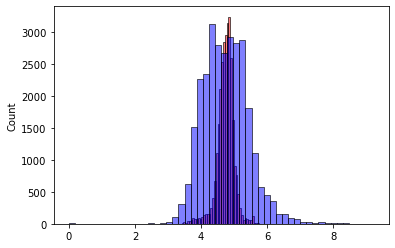

In [62]:
w0, w = train_linear_regression(X_train0, y_train)
y_pred0 = w0 + X_train0.dot(w)

sns.histplot(y_pred0, color = 'red', alpha = 0.5, bins =50) #alpha for the transparency of the graph
sns.histplot(y_train, color = 'blue', alpha = 0.5, bins =50)

In [55]:
# 2nd model with X_train1 (NAs are filled with mean)
train_linear_regression(X_train1, y_train)

(-423.5393082002247,
 array([ 1.31148321e+00, -5.06799071e+00, -4.87741552e-04, -6.63849280e-04,
         5.34563274e-03,  1.32706019e-03,  6.38794182e-04]))

<AxesSubplot:ylabel='Count'>

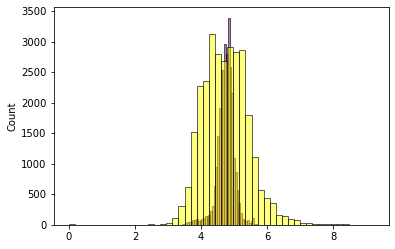

In [65]:
w0, w = train_linear_regression(X_train1, y_train)
y_pred1 = w0 + X_train1.dot(w)

sns.histplot(y_pred1, color = 'purple', alpha = 0.5, bins =50) #alpha for the transparency of the graph
sns.histplot(y_train, color = 'yellow', alpha = 0.5, bins =50)

#### RMSE

In [139]:
def rmse(y, y_pred):
    error = y - y_pred
    se = error ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [71]:
#Validation sets for two options
X_train_val0 = df_val[base].fillna(0)

X_train_val1 = df_val
mean_imp.fit(X_train_val1[['reviews_per_month']])
X_train_val1['reviews_per_month'] = mean_imp.transform(X_train_val1[['reviews_per_month']]).ravel()
X_train_val1.isnull().sum()

latitude                          0
longitude                         0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [74]:
# RMSE for the 1st model with X_train0 (NAs are filled with 0)
y_pred0 = w0 + X_train_val0.dot(w)

round(rmse(y_val, y_pred0),2)

0.65

In [76]:
# RMSE for the 2nd model with X_train1 (NAs are filled with mean)
y_pred1 = w0 + X_train_val1.dot(w)


round(rmse(y_val, y_pred1),2)

0.65

We get RMSE value as the same for both model.

### Question 4

* Now let's train a regularized linear regression.
* For this question, fill the NAs with 0. 
* Try different values of `r` from this list: `[0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]`.
* Use RMSE to evaluate the model on the validation dataset.
* Round the RMSE scores to 2 decimal digits.
* Which `r` gives the best RMSE?

If there are multiple options, select the smallest `r`.

In [94]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [113]:
def train_linear_regression_reg(X,  y, r=0.01):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
    
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [109]:
X_train = df_train[base].fillna(0) #or prepare_X(df_train)
X_val = df_val[base].fillna(0)

In [116]:
#Regularized linear regression with parameter r = 0
w0, w = train_linear_regression_reg(X_train, y_train, r=0)

y_pred = w0 + X_val.dot(w)
round(rmse(y_val, y_pred),2)

0.65

In [117]:
#Regularized linear regression with parameter r = 0.000001
w0, w = train_linear_regression_reg(X_train, y_train, r=0.000001)

y_pred = w0 + X_val.dot(w)
round(rmse(y_val, y_pred),2)

0.65

In [118]:
#Regularized linear regression with parameter r = 0.0001
w0, w = train_linear_regression_reg(X_train, y_train, r=0.0001)

y_pred = w0 + X_val.dot(w)
round(rmse(y_val, y_pred),2)

0.65

In [119]:
#Regularized linear regression with parameter r = 0.001
w0, w = train_linear_regression_reg(X_train, y_train, r=0.001)

y_pred = w0 + X_val.dot(w)
round(rmse(y_val, y_pred),2)

0.65

In [120]:
#Regularized linear regression with parameter r = 0.01
w0, w = train_linear_regression_reg(X_train, y_train, r=0.01)

y_pred = w0 + X_val.dot(w)
round(rmse(y_val, y_pred),2)

0.66

In [121]:
#Regularized linear regression with parameter r = 0.1
w0, w = train_linear_regression_reg(X_train, y_train, r=0.1)

y_pred = w0 + X_val.dot(w)
round(rmse(y_val, y_pred),2)

0.68

In [122]:
#Regularized linear regression with parameter r = 1
w0, w = train_linear_regression_reg(X_train, y_train, r=1)

y_pred = w0 + X_val.dot(w)
round(rmse(y_val, y_pred),2)

0.69

In [123]:
#Regularized linear regression with parameter r = 5
w0, w = train_linear_regression_reg(X_train, y_train, r=5)

y_pred = w0 + X_val.dot(w)
round(rmse(y_val, y_pred),2)

0.69

In [124]:
#Regularized linear regression with parameter r = 10
w0, w = train_linear_regression_reg(X_train, y_train, r=10)

y_pred = w0 + X_val.dot(w)
round(rmse(y_val, y_pred),2)

0.69

The highest RMSE belongs to r=1, 5 and 10.

### Question 5 

* We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
* Try different seed values: `[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]`.
* For each seed, do the train/validation/test split with 60%/20%/20% distribution.
* Fill the missing values with 0 and train a model without regularization.
* For each seed, evaluate the model on the validation dataset and collect the RMSE scores. 
* What's the standard deviation of all the scores? To compute the standard deviation, use `np.std`.
* Round the result to 3 decimal digits (`round(std, 3)`)


In [143]:
for i in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    n = len(new_data)
    n_val = int(n * 0.2)
    n_test = int(n * 0.2)
    n_train = n - n_val - n_test
    
    idx=np.arange(n)
    np.random.seed(i)
    np.random.shuffle(idx)
    
    df_train = new_data.iloc[idx[:n_train]]
    df_val = new_data.iloc[idx[n_train:n_train*n_val]]
    df_test = new_data.iloc[idx[n_train+n_val:]]
    
    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)
    
    #log transformation to the price variable using the np.log1p() function
    y_train = np.log1p(df_train.price.values)
    y_test = np.log1p(df_test.price.values)
    y_val = np.log1p(df_val.price.values)
    
    #Drop 'price'
    del df_train['price']
    del df_test['price']
    del df_val['price']
    
    #Conducting Linear Regression without regularization
    X_train = df_train[base].fillna(0) #or prepare_X(df_train)
    X_val = df_val[base].fillna(0)
    
    w0, w = train_linear_regression(X_train, y_train)
    
    y_pred = w0 + X_val.dot(w)
    rmse_score = rmse(y_val, y_pred)
    
    print('RMSE for',i,'is', rmse_score)

RMSE for 0 is 0.6428344273743551
RMSE for 1 is 0.6474635060078879
RMSE for 2 is 0.6443117951430242
RMSE for 3 is 0.638593086244812
RMSE for 4 is 0.6501003606833153
RMSE for 5 is 0.6348980176395308
RMSE for 6 is 0.6386301983149902
RMSE for 7 is 0.6532591384226905
RMSE for 8 is 0.64475968659311
RMSE for 9 is 0.6443969146554392


In [144]:
#Standard deviation of RMSEs
scores = [0.6428,0.6474,0.6443,0.6385,0.6501,0.6348,0.6386,0.6532,0.6447,0.6443]
round(np.std(scores),3)

0.005

The standard deviation of the RMSE scores is low, so our model is stable. 

### Question 6

* Split the dataset like previously, use seed 9.
* Combine train and validation datasets.
* Fill the missing values with 0 and train a model with `r=0.001`. 
* What's the RMSE on the test dataset?

In [153]:
n = len(new_data)
n_test = int(n * 0.2)
n_train = n - n_test

idx=np.arange(n)
np.random.seed(9)
np.random.shuffle(idx)

df_train = new_data.iloc[idx[:n_train]]
df_test = new_data.iloc[idx[n_train:]]

df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

#log transformation to the price variable using the np.log1p() function
y_train = np.log1p(df_train.price.values)
y_test = np.log1p(df_test.price.values)


#Drop 'price'
del df_train['price']
del df_test['price']


#Conducting Linear Regression with regularization
X_train = df_train[base].fillna(0) #or prepare_X(df_train)
X_test = df_test[base].fillna(0)


w0, w = train_linear_regression_reg(X_train, y_train, r=0.001)

y_pred = w0 + X_test.dot(w)
rmse_score = rmse(y_test, y_pred)
print('RMSE for the test data is:', rmse_score)

RMSE for the test data is: 0.6452771348551656
